## SparkMagic
Jupyter notebook에서 livy를 통해 spark를 바로 호출하는 방법
https://github.com/jupyter-incubator/sparkmagic

python 3.9에서 kernel실행시 아래 에러나서, 3.7에서 했을 때, 정상 작동
```'coroutine' object is not subscriptable```

~/.sparkmagic/conf.json 에 cluster ip설정 필요

In [1]:
%%help

Magic,Example,Explanation
info,%%info,Outputs session information for the current Livy endpoint.
cleanup,%%cleanup -f,"Deletes all sessions for the current Livy endpoint, including this notebook's session. The force flag is mandatory."
delete,%%delete -f -s 0,Deletes a session by number for the current Livy endpoint. Cannot delete this kernel's session.
logs,%%logs,Outputs the current session's Livy logs.
configure,"%%configure -f{""executorMemory"": ""1000M"", ""executorCores"": 4}",Configure the session creation parameters. The force flag is mandatory if a session has already been created and the session will be dropped and recreated.Look at Livy's POST /sessions Request Body for a list of valid parameters. Parameters must be passed in as a JSON string.
spark,%%spark -o dfdf = spark.read.parquet('...,"Executes spark commands. Parameters: -o VAR_NAME: The Spark dataframe of name VAR_NAME will be available in the %%local Python context as a Pandas dataframe with the same name. -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe that will be pulled from Livy to Jupyter. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
sql,%%sql -o tables -qSHOW TABLES,"Executes a SQL query against the variable sqlContext (Spark v1.x) or spark (Spark v2.x). Parameters: -o VAR_NAME: The result of the SQL query will be available in the %%local Python context as a Pandas dataframe. -q: The magic will return None instead of the dataframe (no visualization). -m, -n, -r are the same as the %%spark parameters above."
local,%%locala = 1,All the code in subsequent lines will be executed locally. Code must be valid Python code.
send_to_spark,%%send_to_spark -i variable -t str -n var,"Sends a variable from local output to spark cluster. Parameters: -i VAR_NAME: Local Pandas DataFrame(or String) of name VAR_NAME will be available in the %%spark context as a Spark dataframe(or String) with the same name. -t TYPE: Specifies the type of variable passed as -i. Available options are: `str` for string and `df` for Pandas DataFrame. Optional, defaults to `str`. -n NAME: Custom name of variable passed as -i. Optional, defaults to -i variable name. -m MAXROWS: Maximum amount of Pandas rows that will be sent to Spark. Defaults to 2500."
pretty,%%pretty,"If the cell output is a dataframe, like df.show(), then it will pretty print the dataframe as an HTML table"


In [16]:
%lsmagic

Available line magics:
%_do_not_call_change_endpoint  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplot  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%_do_not_call_allow_retry_fatal  %%_do_not_call_change_language  %%_d

In [4]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
8844,application_1641191423092_4697,pyspark,idle,Link,Link,None,
8845,application_1641191423092_4698,pyspark,idle,Link,Link,None,
8846,application_1641191423092_4699,pyspark,idle,Link,Link,None,✔


In [46]:
%%local
# local 에서 호출
a = 1


UsageError: Line magic function `%%spark` not found.


In [6]:
print(a)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'a' is not defined
Traceback (most recent call last):
NameError: name 'a' is not defined



In [7]:
%%local
print(a)

1


In [15]:
%%cleanup -f

In [ ]:
%%logs

In [ ]:
%%!
ls  # perform ls on local machine

In [45]:
%%spark

from pyspark.sql import SparkSession
spark: SparkSession = spark

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
#show df without show
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("My App").getOrCreate()

data = [
    [1, 1, 'A'],
    [2, 2, 'A'],
    [3, 3, 'A'],
    [4, 3, 'B'],
    [5, 4, 'B'],
    [6, 5, 'C'],
    [7, 6, 'C']]
df = spark.sparkContext.parallelize(data).toDF(('column_1', 'column_2', 'column_3'))
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------+--------+
|column_1|column_2|column_3|
+--------+--------+--------+
|       1|       1|       A|
|       2|       2|       A|
|       3|       3|       A|
|       4|       3|       B|
|       5|       4|       B|
|       6|       5|       C|
|       7|       6|       C|
+--------+--------+--------+

In [ ]:
%%sql
select 1, 2, 3

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

In [61]:
%%pretty
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("My App").getOrCreate()

data = [
    [1, 1, 'A'],
    [2, 2, 'A'],
    [3, 3, 'A'],
    [4, 3, 'B'],
    [5, 4, 'B'],
    [6, 5, 'C'],
    [7, 6, 'C']]
df = spark.sparkContext.parallelize(data).toDF(('column_1', 'column_2', 'column_3'))

# This will print a pretty table
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

column_1,column_2,column_3
1,1,A
2,2,A
3,3,A
4,3,B
5,4,B
6,5,C
7,6,C


## Spark to Local

In [48]:
%%spark -o df
# send object to local
data = [
    [1, 1, 'A'],
    [2, 2, 'A'],
    [3, 3, 'A'],
    [4, 3, 'B'],
    [5, 4, 'B'],
    [6, 5, 'C'],
    [7, 6, 'C']]
df = spark.sparkContext.parallelize(data).toDF(('column_1', 'column_2', 'column_3'))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%local
# access object from remote on local
df

Output()

In [79]:
%%local
c = "1234"

## send to spark

-i : variable name
-t : type
-n : spark에서의 variable name

In [80]:
%%send_to_spark -i c -t str -n c


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Successfully passed 'c' as 'c' to Spark kernel

In [81]:
print(c)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1234

In [82]:
%%send_to_spark -i df -t df -n df2

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Successfully passed 'df' as 'df2' to Spark kernel

In [83]:
df2

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------+--------+
|column_1|column_2|column_3|
+--------+--------+--------+
|       1|       1|       A|
|       2|       2|       A|
|       3|       3|       A|
|       4|       3|       B|
|       5|       4|       B|
|       6|       5|       C|
|       7|       6|       C|
+--------+--------+--------+

In [ ]:
%%configure -f
{"conf": {
    "spark.jars.packages": "com.jsuereth:scala-arm_2.11:2.0,ml.combust.bundle:bundle-ml_2.11:0.13.0,com.databricks:dbutils-api_2.11:0.0.3",
    "spark.jars": "s3://DOC-EXAMPLE-BUCKET/my-jar.jar"
}
}

In [2]:
import matplotlib.pyplot as plt
sentences = [
    [1],
    [4]
]

# spark is the Spark Session automatically started by pyspark.
data = spark.createDataFrame(sentences).toDF("text")
data.toPandas().plot()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<AxesSubplot:>

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

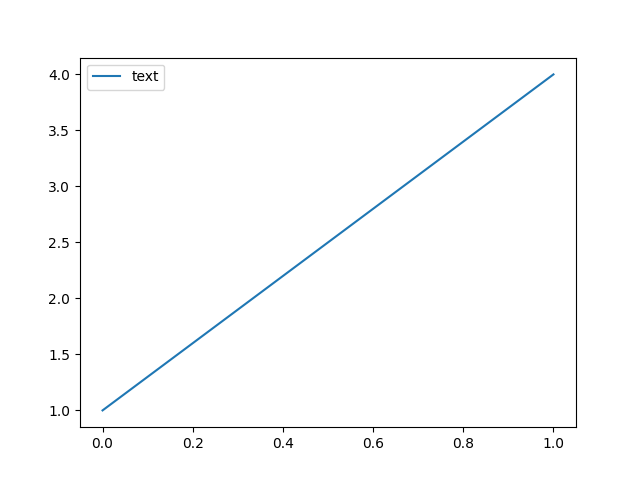

In [5]:
%matplot plt

# 다중 cluster사용하기
- https://github.com/jupyter-incubator/sparkmagic/blob/master/examples/Magics%20in%20IPython%20Kernel.ipynb
- 여러 cluster를 같이 사용하는 방법.
- python kernel에서 시작해야 하고,
- spark코드 실행시 %%spark 를 추가해야 함.
- 새로 추가한 endpoint는 jupyter다시 실행하면 리셋됨
-

In [2]:

%load_ext sparkmagic.magics
%manage_spark



MagicsControllerWidget(children=(Tab(children=(ManageSessionWidget(children=(HTML(value='<br/>'), HTML(value='…

In [5]:
# spark 커맨드 사용 가이드.
%spark?

In [ ]:
%spark logs

In [ ]:
%%spark
df = spark.read.json("/apps/spark-2.3.3/examples/src/main/resources/people.json")
df.createOrReplaceTempView("people")


In [ ]:
%%spark -c sql
SHOW TABLES


In [ ]:

%%spark -c sql -o df_people --maxrows 10
SELECT * FROM people
# output을 local에 받아서, 후처리 가능.

In [7]:
from autovizwidget.widget.utils import display_dataframe
display_dataframe(df)
# local에서 dataframe보여주는 library

NameError: name 'df' is not defined

In [ ]:
# server에서 plot rendering. 그래프 그리기 위한 데이터가 많이 필요한 경우, 서버에서 그리기.
%%spark
import matplotlib.pyplot as plt
ax = df.toPandas().plot.bar(x='name',y='age')

In [ ]:
%%spark
%matplot plt

In [ ]:
%%spark -s my_spark
# my_spark라는 세션에서 실행하기